# **Unlocking Healthcare Efficiency Patterns**
## **Patients, Costs, and Outcomes**

## **Overview**
- The National Healthcare Oversight Organization is carrying out an audit of hospitals across the United States.  
- This analysis examines a dataset of 55,500 unique patient records from 10 major hospitals across the U.S. The dataset contains information about hospital admissions, medical conditions, medications, insurance providers, and treatment costs, offering a comprehensive view of the healthcare ecosystem.

## **Problem Statement**
- Healthcare organizations face challenges in optimizing patient care while managing costs. 
- Without data-driven insights, hospitals may struggle with resource allocation, treatment standardization, and identifying patterns in patient demographics and outcomes. 
- This analysis addresses these challenges by extracting meaningful patterns from hospital data.

## **Business Objectives**
1. **General Objective**
- To leverage data analytics for improving healthcare decision-making, optimizing costs, and enhancing patient outcomes

2. **Specific Objectives**
- Identify demographic patterns in hospital admissions
- Analyze prevalence and treatment patterns of medical conditions
- Evaluate hospital performance metrics including length of stay and treatment costs
- Assess medication prescription patterns across conditions and hospitals
- Examine the impact of admission types on patient outcomes and costs
- Analyze insurance provider coverage and cost implications
- Identify geographic patterns in healthcare delivery


In [183]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [186]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**
- Understanding dataset’s structure, types, quality, and any early issues to address before analysis.

### **Loading the Dataset**

In [187]:
df = pd.read_excel("data.xlsx")
df.head()

,Patient ID,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Hospital Latitude,Hospital Longitude
0,ID-2621,64,Female,A+,Hypertension,2020-03-03,Jessica Marshall,Houston Methodist Hospital,Medicare,43913.983738,353,Elective,2020-03-06,Ibuprofen,Abnormal,29.709541,-95.398605
1,ID-2623,18,Female,A+,Hypertension,2022-09-12,Sean Jimenez,Houston Methodist Hospital,Medicare,21146.048929,457,Elective,2022-09-29,Ibuprofen,Abnormal,29.709541,-95.398605
2,ID-2624,57,Female,A+,Hypertension,2022-02-26,Jennifer Crawford,Houston Methodist Hospital,Medicare,47946.861283,200,Elective,2022-03-25,Ibuprofen,Abnormal,29.709541,-95.398605
3,ID-2634,77,Female,A+,Hypertension,2020-12-11,Tiffany Ramirez,Houston Methodist Hospital,Medicare,13385.077913,238,Elective,2020-12-26,Ibuprofen,Abnormal,29.709541,-95.398605
4,ID-2720,81,Female,A+,Hypertension,2019-09-19,Peter Roberts,Houston Methodist Hospital,Medicare,32984.893678,317,Elective,2019-09-26,Ibuprofen,Abnormal,29.709541,-95.398605


### **Data Features**

In [188]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDataset Summary:")
print( df.info())
print("\nDuplicates:", df.duplicated().sum())

Dataset Shape: (55500, 17)

Columns: ['Patient ID', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results', 'Hospital Latitude', 'Hospital Longitude']

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient ID          55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8

**Shape**
- The dataset has 55,500 rows and 17 features/columns.

**Column Descriptions**
- Patient ID: Unique identifier for each patient
- Age: Age of the patient (in years)
- Gender: Gender of the patient (e.g., Male, Female)
- Blood Type: Blood group of the patient (e.g., A+, B-, O+)
- Medical Condition: Primary medical condition diagnosed
- Date of Admission: Date when the patient was admitted to the hospital
- Doctor: Responsible doctor during the stay, not necessarily a specialist.
- Hospital:	Name of the hospital where the patient received treatment
- Insurance Provider: Name of the patient's insurance company
- Billing Amount: Total billing amount for the treatment (in USD)
- Room Number: Room number assigned to the patient during hospital stay
- Admission Type: Type of admission (e.g., Elective, Emergency)
- Discharge Date: Date when the patient was discharged from the hospital
- Medication: General medication prescribed during treatment; may not be specific to the diagnosed condition.
- Test Results:	Outcome of medical tests (e.g., Normal, Abnormal)
- Hospital Latitude: Geographical latitude of the hospital
- Hospital Longitude: Geographical longitude of the hospital

**Data Types**
- A mixture of numerical, categorical and datetime data types.

**Missing Values**
- The dataset has no misisng values.

**Duplicates**
- No duplicates in the dataset

In [189]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Hospital Latitude,Hospital Longitude
count,55500.000000,55500,55500.000000,55500.000000,55500,55500.000000,55500.000000
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621760,35.449313,-93.542397
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,29.709541,-122.455000
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00,29.709541,-95.398605
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00,34.075198,-95.398605
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00,39.296318,-76.592941
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,44.022705,-71.069206
std,19.602454,NaN,14211.454431,115.243069,NaN,5.063795,15.684476


## **Data Preparation**

### **Feature Engineering**
- Creating new, meaningful features that will help us answer the key analysis questions more effectively

In [190]:
# make a copy to maintain original data
data = df.copy()
data.head()

,Patient ID,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Hospital Latitude,Hospital Longitude
0,ID-2621,64,Female,A+,Hypertension,2020-03-03,Jessica Marshall,Houston Methodist Hospital,Medicare,43913.983738,353,Elective,2020-03-06,Ibuprofen,Abnormal,29.709541,-95.398605
1,ID-2623,18,Female,A+,Hypertension,2022-09-12,Sean Jimenez,Houston Methodist Hospital,Medicare,21146.048929,457,Elective,2022-09-29,Ibuprofen,Abnormal,29.709541,-95.398605
2,ID-2624,57,Female,A+,Hypertension,2022-02-26,Jennifer Crawford,Houston Methodist Hospital,Medicare,47946.861283,200,Elective,2022-03-25,Ibuprofen,Abnormal,29.709541,-95.398605
3,ID-2634,77,Female,A+,Hypertension,2020-12-11,Tiffany Ramirez,Houston Methodist Hospital,Medicare,13385.077913,238,Elective,2020-12-26,Ibuprofen,Abnormal,29.709541,-95.398605
4,ID-2720,81,Female,A+,Hypertension,2019-09-19,Peter Roberts,Houston Methodist Hospital,Medicare,32984.893678,317,Elective,2019-09-26,Ibuprofen,Abnormal,29.709541,-95.398605


#### **Length of Stay**

In [191]:
# convert date columns to datetime
data["Date of Admission"] = pd.to_datetime(data["Date of Admission"])
data["Discharge Date"] = pd.to_datetime(data["Discharge Date"])

# length of stay calculation
data["LoS"] = (data["Discharge Date"] - data["Date of Admission"]).dt.days
data["LoS"]

0         3
1        17
2        27
3        15
4         7
         ..
55495    23
55496     2
55497    22
55498    16
55499     2
Name: LoS, Length: 55500, dtype: int64

#### **Admission Year and Month**

In [192]:
#  Extract admission year and month
data["Adm. Year"] = data["Date of Admission"].dt.year
data["Adm. Month"] = data["Date of Admission"].dt.month

data[["Adm. Year", "Adm. Month"]]

,Adm. Year,Adm. Month
0,2020,3
1,2022,9
2,2022,2
3,2020,12
4,2019,9
...,...,...
55495,2020,12
55496,2024,1
55497,2022,10
55498,2021,6


#### **Age Groups**

In [193]:
bins = [0, 14, 18, 35, 50, 65, 80, 100, float('inf')]
labels = ["0-14", "15-17", "18-35", "36-50","51-65", "66-80", "81-100", "100+"]

data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels)
data[["Age", "Age Group"]]

,Age,Age Group
0,64,51-65
1,18,15-17
2,57,51-65
3,77,66-80
4,81,81-100
...,...,...
55495,25,18-35
55496,29,18-35
55497,25,18-35
55498,45,36-50


#### **Hospital GPS**

In [194]:
data["GPS"] = data["Hospital Latitude"].astype(str) + ", " + data["Hospital Longitude"].astype(str)
data["GPS"].head()

0    29.709541, -95.398605
1    29.709541, -95.398605
2    29.709541, -95.398605
3    29.709541, -95.398605
4    29.709541, -95.398605
Name: GPS, dtype: object

In [195]:
data.head()

,Patient ID,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Discharge Date,Medication,Test Results,Hospital Latitude,Hospital Longitude,LoS,Adm. Year,Adm. Month,Age Group,GPS
0,ID-2621,64,Female,A+,Hypertension,2020-03-03,Jessica Marshall,Houston Methodist Hospital,Medicare,43913.983738,...,2020-03-06,Ibuprofen,Abnormal,29.709541,-95.398605,3,2020,3,51-65,"29.709541, -95.398605"
1,ID-2623,18,Female,A+,Hypertension,2022-09-12,Sean Jimenez,Houston Methodist Hospital,Medicare,21146.048929,...,2022-09-29,Ibuprofen,Abnormal,29.709541,-95.398605,17,2022,9,15-17,"29.709541, -95.398605"
2,ID-2624,57,Female,A+,Hypertension,2022-02-26,Jennifer Crawford,Houston Methodist Hospital,Medicare,47946.861283,...,2022-03-25,Ibuprofen,Abnormal,29.709541,-95.398605,27,2022,2,51-65,"29.709541, -95.398605"
3,ID-2634,77,Female,A+,Hypertension,2020-12-11,Tiffany Ramirez,Houston Methodist Hospital,Medicare,13385.077913,...,2020-12-26,Ibuprofen,Abnormal,29.709541,-95.398605,15,2020,12,66-80,"29.709541, -95.398605"
4,ID-2720,81,Female,A+,Hypertension,2019-09-19,Peter Roberts,Houston Methodist Hospital,Medicare,32984.893678,...,2019-09-26,Ibuprofen,Abnormal,29.709541,-95.398605,7,2019,9,81-100,"29.709541, -95.398605"


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient ID          55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

## **Exploratory Data Analysis (EDA)**

### **🧍‍♂️Demographic Insights**
Patients Age, Gender, Blood Type

#### **Age, Gender, Blood Type**

In [197]:
# average age
average_age = round(data["Age"].mean())
print("Average Age: ", average_age)

Average Age:  52


Text(0, 0.5, 'Count')

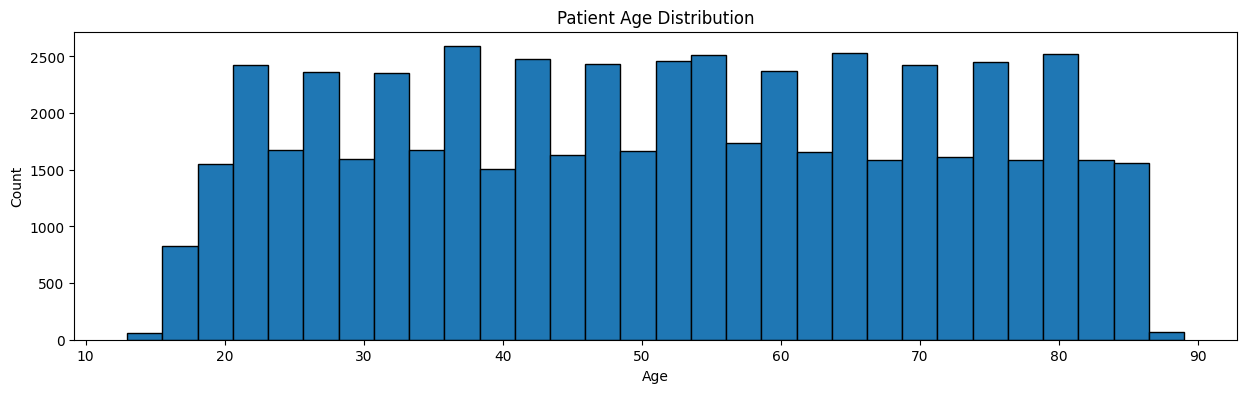

In [198]:
# count patients per age
age_counts = data["Age"].value_counts().sort_index()

plt.figure(figsize=(15, 4))
plt.hist(data["Age"], bins=30, edgecolor="black")
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Age Group Counts:
Age Group
18-35     13644
51-65     12417
36-50     12301
66-80     12215
81-100     4035
15-17       856
0-14         32
100+          0
Name: count, dtype: int64
----------------------------------------
Gender Counts:
Gender
Female        27750
Male          22200
Non-binary     5550
Name: count, dtype: int64
----------------------------------------
Blood Type Counts:
Blood Type
A+     19425
O+     13875
O-      8325
B+      2775
A-      2775
AB+     2775
AB-     2775
B-      2775
Name: count, dtype: int64
----------------------------------------


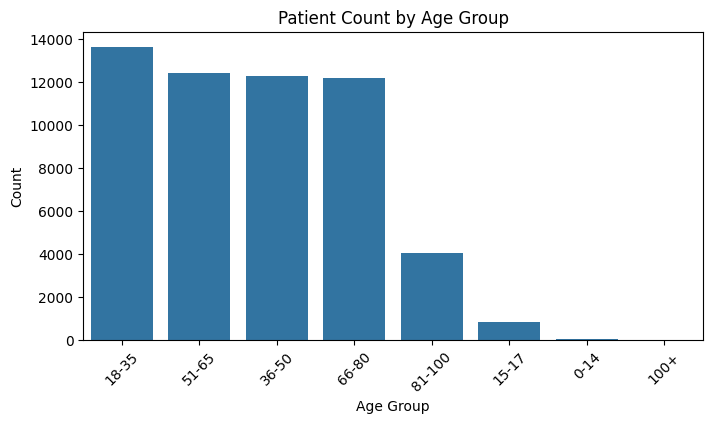

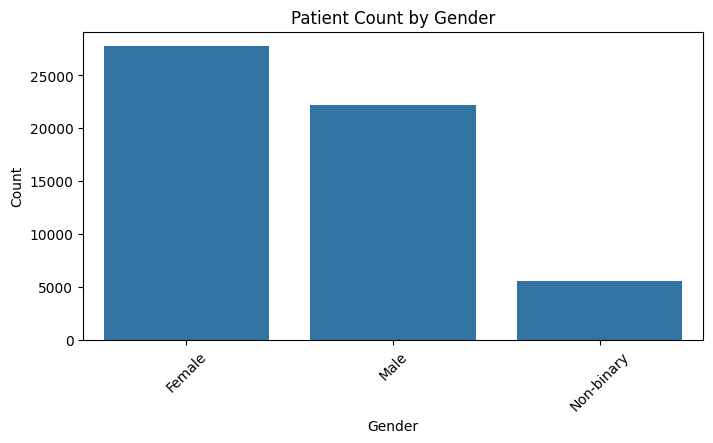

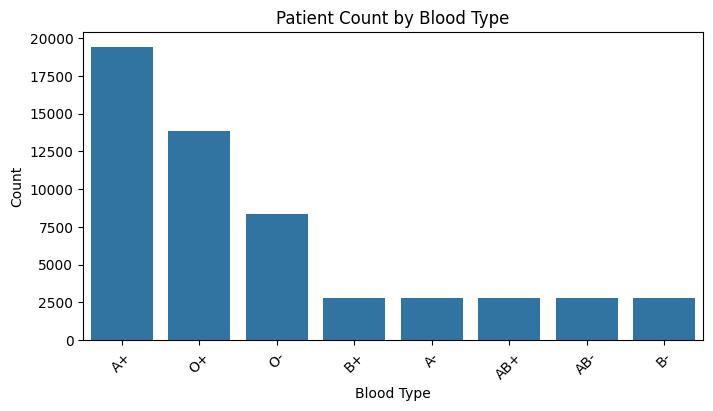

In [199]:
demo_columns = ["Age Group", "Gender", "Blood Type"]

for col in demo_columns:
    print(f"{col} Counts:")
    value_counts = data[col].value_counts().sort_values(ascending=False)
    print(value_counts)
    print("--"*20)

    # Plotting the distribution of each demographic variable
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=value_counts.index)
    plt.xticks(rotation=45)
    plt.title(f"Patient Count by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    

#### **Observations**
1. **Age and Age Group**
- Most patients were between the age of 18 to 80, with an average age of 52 years.
- The 18-35 age group had the highest admission rate.
- Patients under the age of 18 and over 80 were the least in number of those admitted. 
- No patient is over 100 years old.
- The patient age distribution is multimodal, with several peaks across the population.

2. **Gender**
- Female patients had the highest admission rate (27,750), followed by male patients (22,200), and finally non-binary patients (5,550).

3. **Blood Type**
- Most patients had A+ blood type.
- O+ patients were 13,875 and O- patients were 8,325. The rest had 2,775 patients each, revealing a right-skewed distribution pattern when arranged in descending order of patient count.

### **🕒 Temporal Analysis**
- Trends and patterns over time (date features)

#### **Admission and Discharge**

In [407]:
# Group by month
admissions_monthly = data["Date of Admission"].dt.to_period("M").value_counts().sort_index()
discharges_monthly = data["Discharge Date"].dt.to_period("M").value_counts().sort_index()

# Convert PeriodIndex to string for plotting
admissions_monthly.index = admissions_monthly.index.astype(str)
discharges_monthly.index = discharges_monthly.index.astype(str)

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("Admissions", "Discharges"))

# Admissions Line Chart
fig.add_trace(go.Scatter(
    x=admissions_monthly.index,
    y=admissions_monthly.values,
    mode="lines",
    name='Admissions',
    line=dict(color='red')
), row=1, col=1)

# Discharges Line Chart
fig.add_trace(go.Scatter(
    x=discharges_monthly.index,
    y=discharges_monthly.values,
    mode='lines',
    name='Discharges',
    line=dict(color='blue')
), row=2, col=1)

# Update layout
fig.update_layout(
    title_text="Admission and Discharge Trends Over Time",
    title_x=0.5,
    height=800,
    showlegend=False
)

fig.update_xaxes(title_text="Month", tickangle=45)
fig.update_yaxes(title_text="Number of Patients")

fig.show()

#### **Prevalence of Conditions over Time**

#### **Length of Stay Trends over Time**

### **🩺 Medical Condition Distributions**

In [200]:
med_conditions = data["Medical Condition"].unique()
med_conditions

array(['Hypertension', 'Cancer', 'Asthma', 'Diabetes', 'Obesity',
       'Arthritis'], dtype=object)

#### **Prevalence by Gender**

Gender             Female  Male  Non-binary
Medical Condition                          
Arthritis            2775  2220         555
Asthma               2775  1110           0
Cancer               2775  2220         555
Diabetes             7215  5550        1110
Hypertension         6660  5550        1665
Obesity              5550  5550        1665


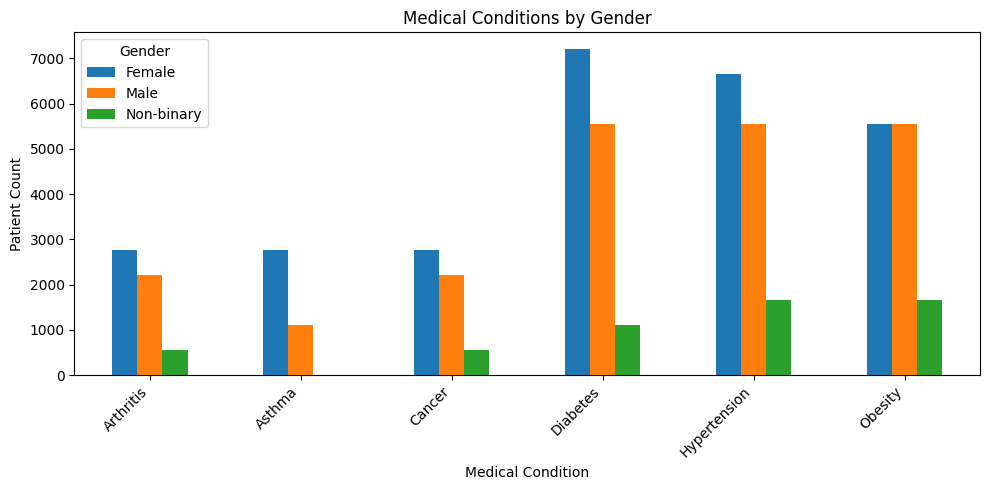

In [201]:
condition_gender = pd.crosstab(data["Medical Condition"], data["Gender"])
print(condition_gender)
condition_gender.plot(kind="bar", stacked=False, figsize=(10, 5))
plt.title("Medical Conditions by Gender")
plt.ylabel("Patient Count")
plt.xlabel("Medical Condition")
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

#### **Prevalence by Age Group**

Age Group          0-14  15-17  18-35  36-50  51-65  66-80  81-100
Medical Condition                                                 
Arthritis             2     96   1363   1230   1244   1237     378
Asthma                3     69    931    882    847    862     291
Cancer                4     89   1369   1222   1200   1274     392
Diabetes             13    196   3456   3061   3128   2991    1030
Hypertension          6    202   3383   3032   3201   3032    1019
Obesity               4    204   3142   2874   2797   2819     925


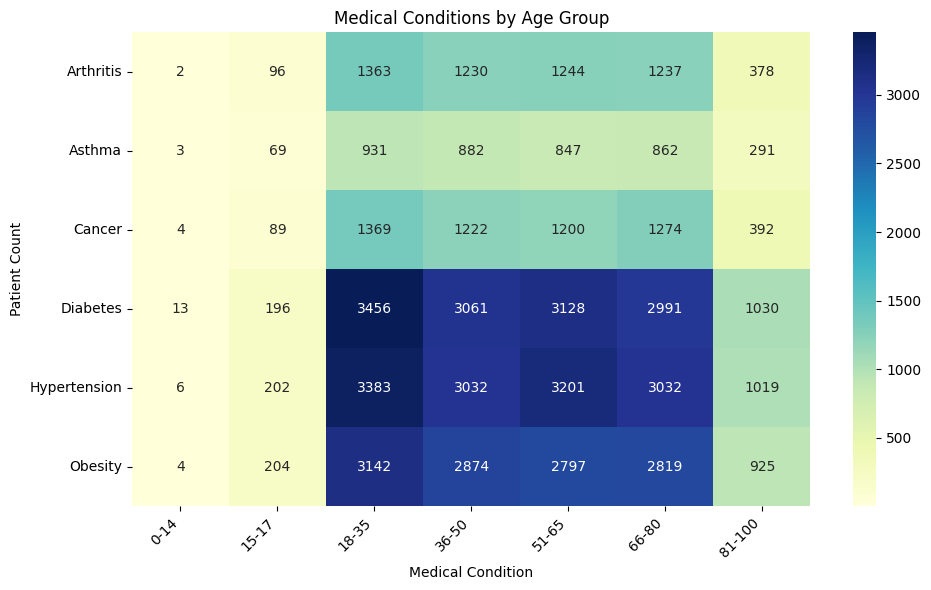

In [202]:
condition_age_group = pd.crosstab(data["Medical Condition"], data["Age Group"])
print(condition_age_group)

plt.figure(figsize=(10, 6))
sns.heatmap(condition_age_group, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Medical Conditions by Age Group")
plt.ylabel("Patient Count")
plt.xlabel("Medical Condition")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Correlation between Blood Type and Medical Condition**

In [203]:
# contingency table
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Blood Type'], data['Medical Condition'])

# Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# strength of association using Cramér's V
import numpy as np

n = contingency_table.values.sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Cramér's V (association strength):", round(cramers_v, 3))

Chi-square Statistic: 119567.2695652174
Degrees of Freedom: 35
P-value: 0.0
Cramér's V (association strength): 0.656


Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                         0    3885    5550         0          9990        0
A-                         0       0       0      1110             0     1665
AB+                        0       0       0         0             0     2775
AB-                        0       0       0         0             0     2775
B+                         0       0       0      2775             0        0
B-                         0       0       0         0             0     2775
O+                         0       0       0      9990          3885        0
O-                      5550       0       0         0             0     2775


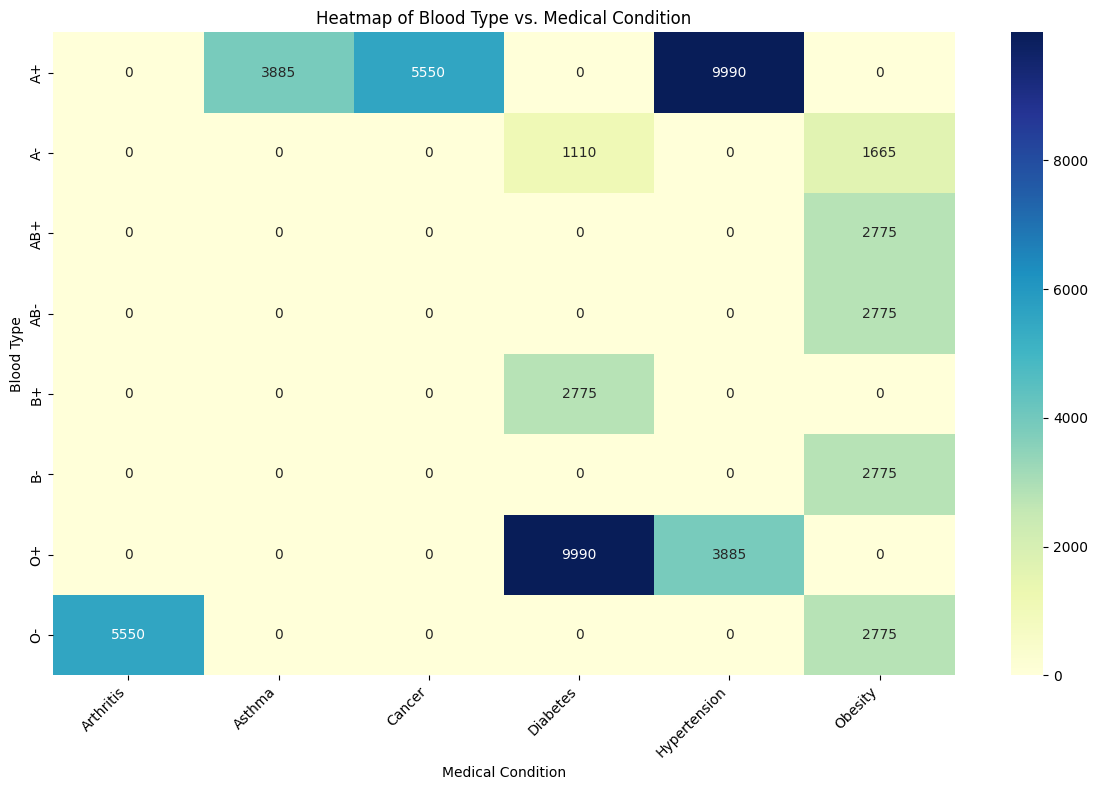

In [204]:
# heatmap of blood type vs. medical condition

print(contingency_table)

plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Blood Type vs. Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Observations**  
**Prevalence**
- There are 6 medical conditions represented in the dataset.
- Female patients count was highest in all but obesity condition, where they tied with male patients.
- Notably, asthma count was zero among non-binary patients.
- Most patients were admitted with Hypertension, Diabetes and Obesity. These conditions mostly affected the 18-80 year old patients.
- The 0-14 age range had low counts of each condition.
- A few patients had Asthma, and was significantly higher among 18-80 year olds .

**Blood Group-Condition Correlation**  

**Chi-square statistic = 119,567.27**
- This is a very large value, suggesting the observed distribution differs substantially from what we'd expect by chance.

**Degrees of freedom = 35**
- This is based on the number of categories in each variable:
    - (rows−1)×(columns−1)
    - (rows−1)×(columns−1)

**P-value = 0.0**
- A p-value this low (less than 0.001) means the result is highly statistically significant. You can confidently reject the null hypothesis (i.e., that there is no association between blood type and medical condition). (P-value < 0.05)

**Cramér’s V = 0.656**
- This indicates a strong association:

    - 0.1–0.3: weak

    - 0.3–0.5: moderate

    - 0.5+: strong

**Conclusion**
- There is a strong, statistically significant relationship between blood type and medical condition. Certain blood types may be more or less likely to have particular conditions.

### **🛏 Hospital Stay Analysis**
Patient Volume, Admission Types, Length of Stay

#### **Hospital Location**

In [ ]:
print(data["Hospital"].nunique(), "hospitals in the dataset\n")

# hospital names
print(data["Hospital"].unique())

10 hospitals in the dataset

['Houston Methodist Hospital' 'Johns Hopkins Hospital'
 'UCLA Medical Center' 'Mayo Clinic' 'Cleveland Clinic'
 'Northwestern Memorial Hospital' 'NewYork-Presbyterian Hospital'
 'Cedars-Sinai Medical Center' 'UCSF Medical Center'
 'Massachusetts General Hospital']


**Hospital Location**

In [206]:
hospital_volume = data['Hospital'].value_counts().reset_index()
hospital_volume.columns = ['Hospital', 'Patient Count']
hospital_map = data.drop_duplicates('Hospital').merge(hospital_volume, on='Hospital')

fig = px.scatter_map(
    hospital_map,
    lat='Hospital Latitude',
    lon='Hospital Longitude',
    size='Patient Count',
    color="Hospital",
    hover_name='Hospital',
    zoom=2,
    map_style='open-street-map',
    title='Hospital Locations and Patient Volume'
)
fig.update_layout(
    legend_title_text = "Hospital", 
    title_text='Hospital Locations and Patient Volume', 
    title_x=0.5,
    width=1500,
    height=800)
fig.show()

#### **Admission Types**

In [258]:
admission_trends

,Adm. Year,Adm. Month,Admission Type,Count
0,2019,5,Elective,244
1,2019,5,Emergency,226
2,2019,5,Urgent,216
3,2019,6,Elective,321
4,2019,6,Emergency,276
...,...,...,...,...
178,2024,4,Emergency,332
179,2024,4,Urgent,300
180,2024,5,Elective,77
181,2024,5,Emergency,64


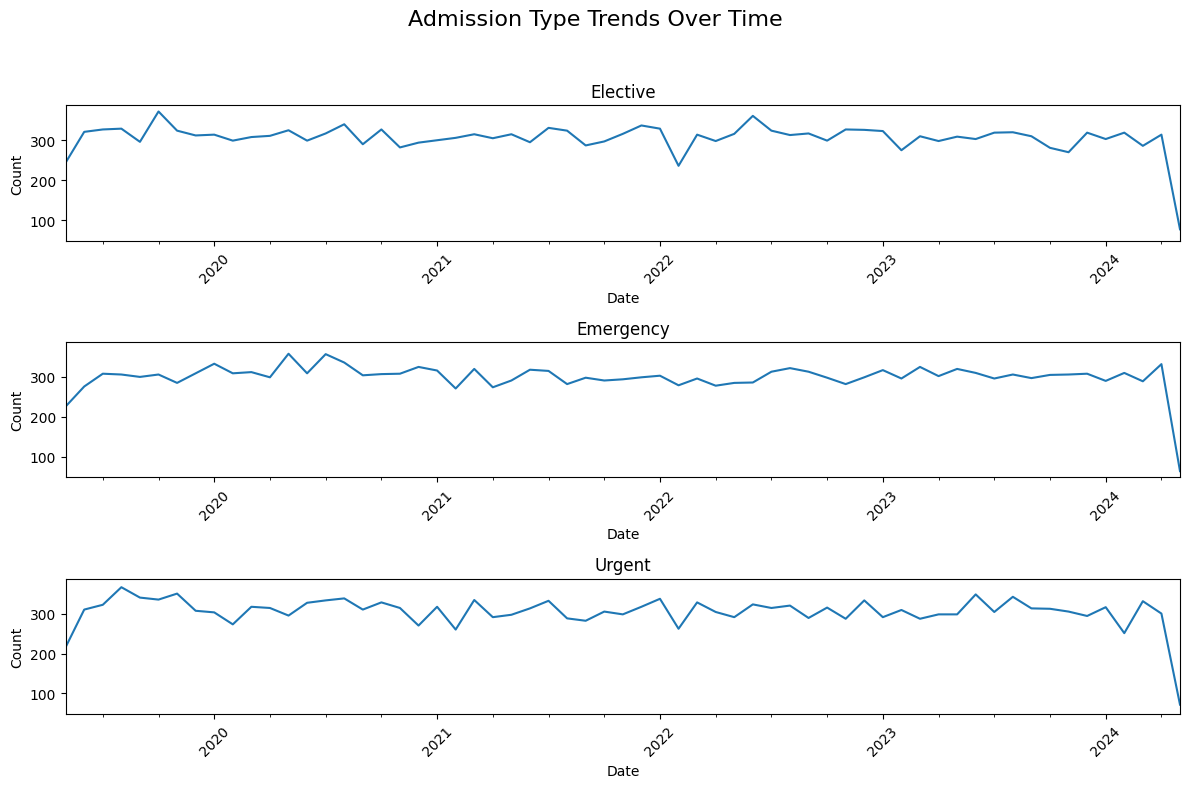

In [ ]:
# Group data by year, month, and admission type
admission_trends = data.groupby(["Adm. Year", "Adm. Month", "Admission Type"]).size().reset_index(name="Count")

# Pivot the data for better visualization
admission_trends_pivot = admission_trends.pivot_table(index=["Adm. Year", "Adm. Month"], 
                                                      columns="Admission Type", 
                                                      values="Count", 
                                                      fill_value=0)


admission_trends_pivot.index = pd.to_datetime(
    admission_trends_pivot.index.get_level_values(0).astype(str) + "-" +
    admission_trends_pivot.index.get_level_values(1).astype(str).str.zfill(2)
)
# Create subplots
fig, axes = plt.subplots(nrows=admission_trends_pivot.shape[1], ncols=1, figsize=(12, 8), sharey=True)

for i, col in enumerate(admission_trends_pivot.columns):
    admission_trends_pivot[col].plot(ax=axes[i], title=col)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle("Admission Type Trends Over Time", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust space for title
plt.show()


Admission Type Counts:
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


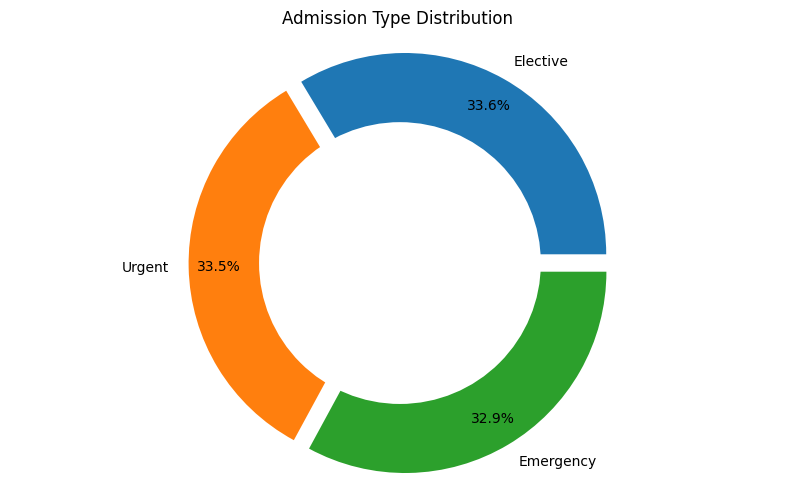

In [207]:
admission_type_counts = data["Admission Type"].value_counts()
print("Admission Type Counts:")
print(admission_type_counts)    

# pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    admission_type_counts, 
    labels=admission_type_counts.index, 
    autopct='%1.1f%%', 
   pctdistance=0.85,                  
   explode=(0.05, 0.05, 0.05)
   )  

# circle for center of pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # add circle into the pie chart

plt.title("Admission Type Distribution")
plt.axis('equal');


#### **Length of Stay**

In [208]:
# average length of stay
print("Average Length of Stay: ", round(data["LoS"].mean(), 2), "days")

# minimum length of stay
print("Least days spent: ", round(data["LoS"].min(), ndigits=2,),"day")

# maximum length of stay
print("Most days spent: ", round(data["LoS"].max(), ndigits=2),"days\n")

# length of stay - highest and lowest patient count
los_counts = data["LoS"].value_counts()

highest_patient_count_los = los_counts.idxmax()
highest_patient_count = los_counts.max()
lowest_patient_count_los = los_counts.idxmin()
lowest_patient_count = los_counts.min()

print(f"Length of Stay with Highest Patient Count: {highest_patient_count_los} days")
print(f"Number of Patients: {highest_patient_count}\n")

print(f"Length of Stay with Lowest Patient Count: {lowest_patient_count_los} days")
print(f"Number of Patients: {lowest_patient_count}")

Average Length of Stay:  15.51 days
Least days spent:  1 day
Most days spent:  30 days

Length of Stay with Highest Patient Count: 21 days
Number of Patients: 1959

Length of Stay with Lowest Patient Count: 16 days
Number of Patients: 1757


**LoS Distribution**

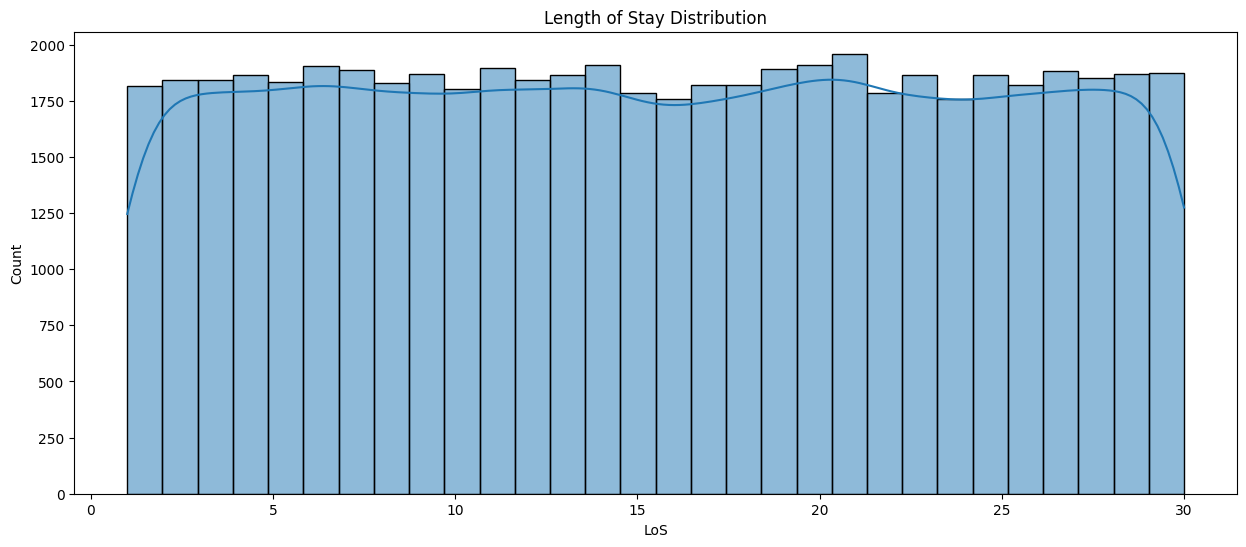

In [209]:
plt.figure(figsize=(15, 6))

sns.histplot(data["LoS"], bins=30, kde=True)
plt.title("Length of Stay Distribution");


**Average Length of Stay per Hospital**

Hospital
Cedars-Sinai Medical Center       15.52
Cleveland Clinic                  15.75
Houston Methodist Hospital        15.51
Johns Hopkins Hospital            15.53
Massachusetts General Hospital    15.40
Mayo Clinic                       15.58
NewYork-Presbyterian Hospital     15.48
Northwestern Memorial Hospital    15.45
UCLA Medical Center               15.46
UCSF Medical Center               15.39
Name: LoS, dtype: float64


Text(0.5, 1.0, 'Length of Stay by Hospital')

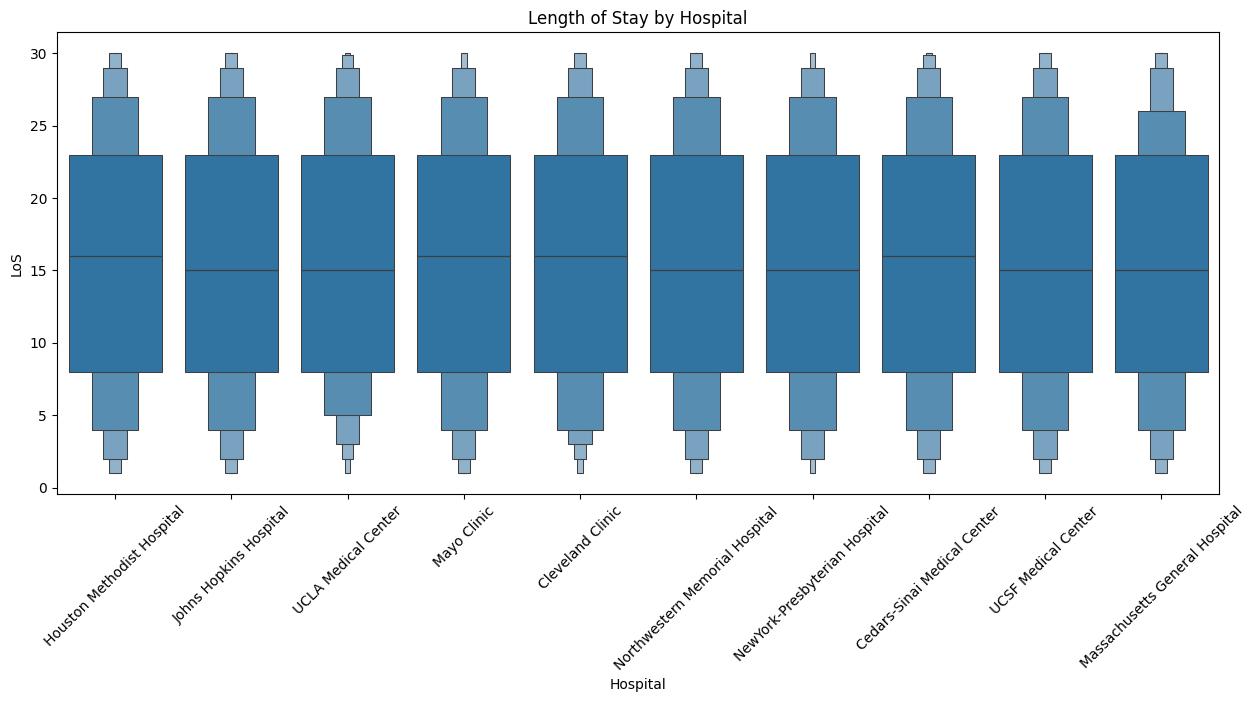

In [210]:
# display the means
hospital_means = data.groupby("Hospital")["LoS"].mean()
print(round(hospital_means,2))

plt.figure(figsize=(15, 6))
sns.boxenplot(data=data, x="Hospital", y="LoS")
plt.xticks(rotation=45)
plt.title("Length of Stay by Hospital")

**Average Length of Stay by Admission Type**

Admission Type
Elective     15.53
Emergency    15.60
Urgent       15.41
Name: LoS, dtype: float64


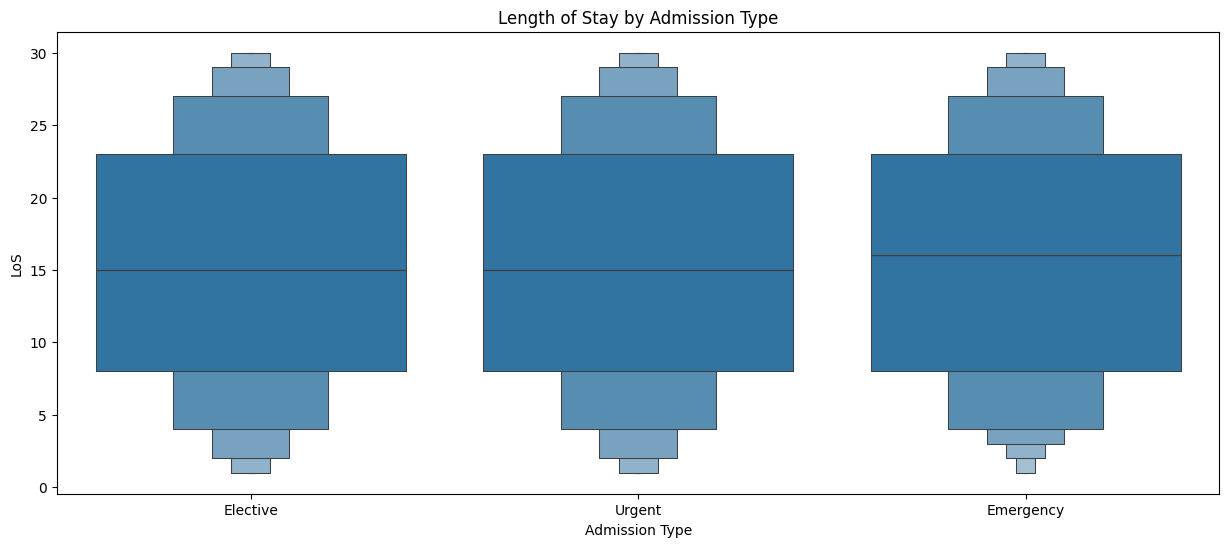

In [211]:
# display the means
adm_type_means = data.groupby("Admission Type")["LoS"].mean()
print(round(adm_type_means,2))

plt.figure(figsize=(15, 6)) 
sns.boxenplot(data=data, x="Admission Type", y="LoS")
plt.title("Length of Stay by Admission Type");


**Average Length of Stay by Medical Condition**

Medical Condition
Hypertension    15.64
Arthritis       15.56
Diabetes        15.49
Cancer          15.46
Obesity         15.43
Asthma          15.39
Name: LoS, dtype: float64


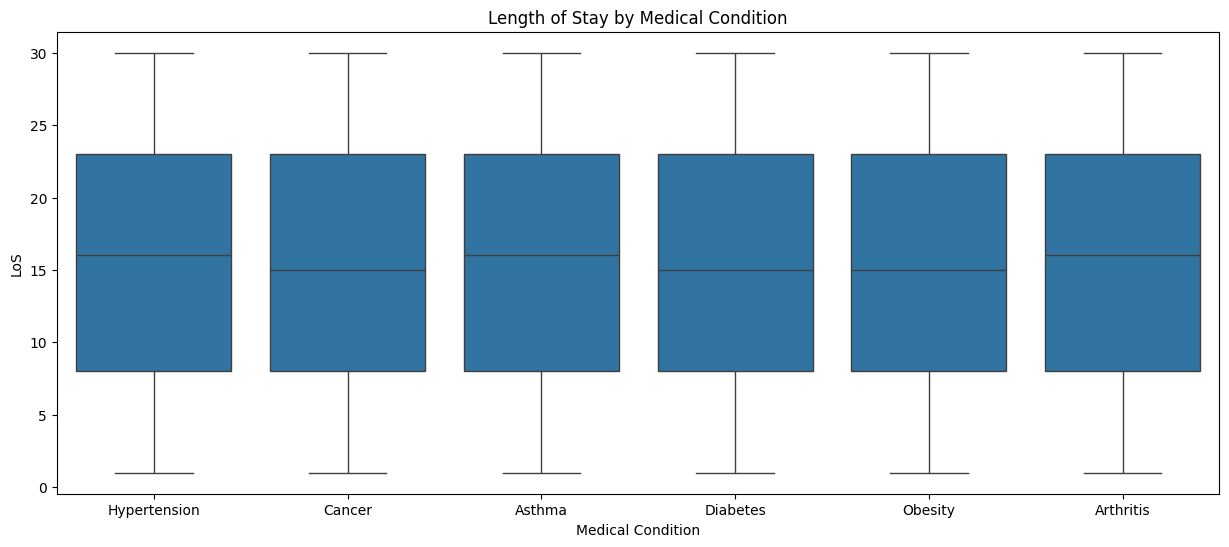

In [212]:
# display the means
los_condition_means = data.groupby("Medical Condition")["LoS"].mean().sort_values(ascending=False)
print(round(los_condition_means,2))

plt.figure(figsize=(15, 6)) 
sns.boxplot(data=data, x="Medical Condition", y="LoS")
plt.title("Length of Stay by Medical Condition");

**Age Group vs Admission Type by avg. LoS**

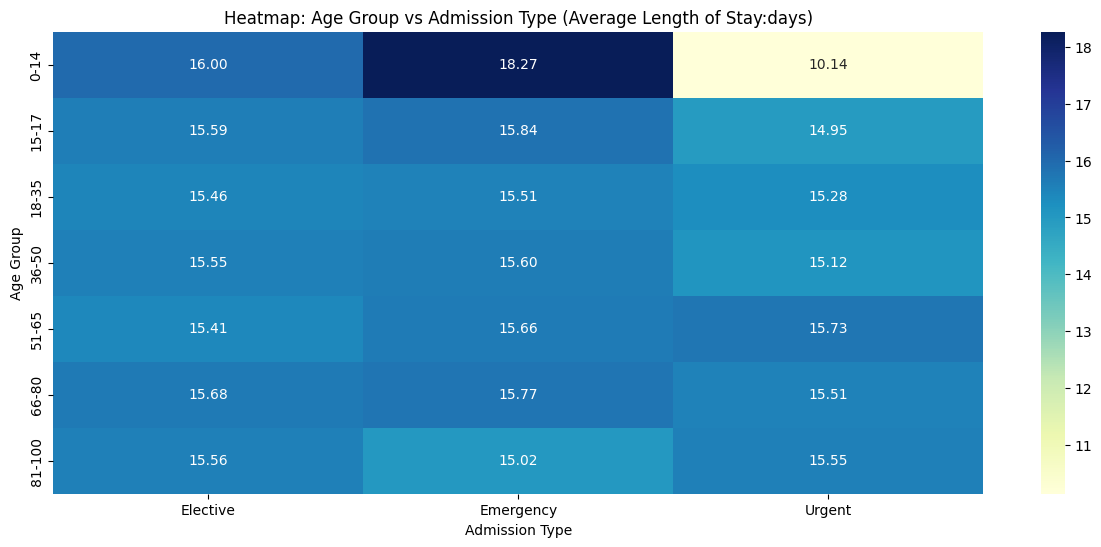

In [213]:
# Age Group vs Admission Type by avg. LoS
age_adm_los_heatmap = data.pivot_table(index="Age Group", columns="Admission Type", values="LoS", aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(age_adm_los_heatmap, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap: Age Group vs Admission Type (Average Length of Stay:days)")
plt.xlabel("Admission Type")
plt.ylabel("Age Group")
plt.show()

#### **Observations**
- On average, patients spent 15.51 (16) days in hospital. The average across hospitals ranges between 15.39 and 15.75 days.
- The most common length of stay among patients is 21 days, with 1,959 patients having stayed for this duration. In contrast, the least common length of stay is 16 days, recorded for only 1,757 patients.

**Hospital**
- There is minimal variation in the length of stay in all hospitals, with LoS between 15.39 and 15.75 days.
- For each of the hospitals, the shortest stay was one day long and the longest stay was 30 days long.

**Admission Types**
- Patients were admitted through emergency, urgent or elective options.
- The admission types have a balanced distribution ranging from 32.9% to 33.6%.
- Emergency admissions for the youngest patients (0–14) have the longest stays (18.27 days), which is significantly higher than Urgent (10.14 days). (an outlier). Suggests emergencies in this group may be more serious or require more intensive care.

**Medical Conditions**
- Hypertension, Arthritis and Diabetes led the pack with the longest stay durations.
- The variation is once again minimal across the 6 conditions (15.39 and 15.64 days).

**Age Groups**
- Average stay durations are relatively stable across age groups, hovering around the 15-day mark.
- There's no sharp rise or drop in average stay with increasing age for elective or urgent admissions.
- The 66–100 age range have slightly higher average stays that increase with age for elective and urgent admissions.
- Indicates older patients may require longer monitoring or recovery, even when care is pre-planned or moderately urgent.
- Emergency and elective stays are nearly identical across age groups, showing minimal variation.
- Emergency patients in the 0-14 age group had the longest average stay of 18 days. Similarly, those under urgent admission in the same age group had the shortest stay of 10 days.

### **💵 Cost Analysis**

In [214]:
average_billing_amount = round(data["Billing Amount"].mean(), 2)
print("Average Billing Amount: $", average_billing_amount)

print("Lowest Billing Amount: $", round(data["Billing Amount"].min(), 2))
print("Highest Billing Amount: $", round(data["Billing Amount"].max(), 2))

Average Billing Amount: $ 25539.32
Lowest Billing Amount: $ -2008.49
Highest Billing Amount: $ 52764.28


#### **Overall Billing Distribution**

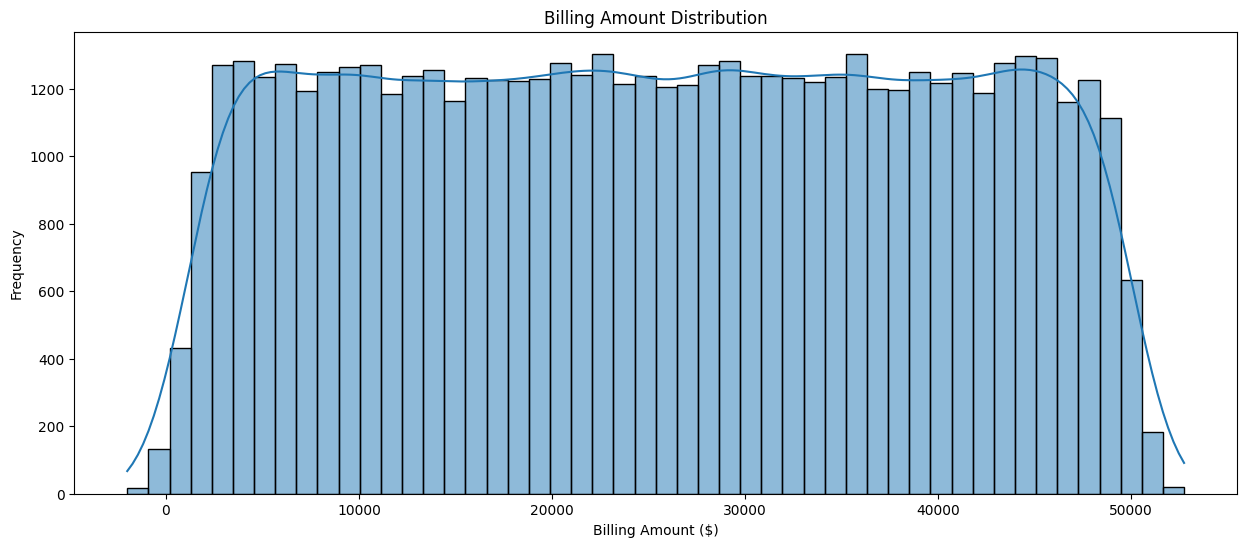

In [215]:
plt.figure(figsize=(15, 6))
sns.histplot(data["Billing Amount"], bins=50, kde=True)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Frequency");

#### **Negative Billing**

In [216]:
# records with negative billing amounts
negative_billing = data[data["Billing Amount"] < 0]

# Count of records with negative billing amounts
negative_count = len(negative_billing)

# average, highest, and lowest negative billing amounts
average_negative_billing = round(negative_billing["Billing Amount"].mean(), 2)
highest_negative_billing = round(negative_billing["Billing Amount"].max(), 2)
lowest_negative_billing = round(negative_billing["Billing Amount"].min(), 2)

print("Count of Records with Negative Billing Amount:", negative_count)
print("Average Negative Billing Amount: $", average_negative_billing)
print("Highest Negative Billing Amount: $", highest_negative_billing)
print("Lowest Negative Billing Amount: $", lowest_negative_billing)

Count of Records with Negative Billing Amount: 108
Average Negative Billing Amount: $ -499.3
Highest Negative Billing Amount: $ -23.87
Lowest Negative Billing Amount: $ -2008.49


#### **Billing by Medical Condition**

Average Billing Amount by Medical Condition:
Medical Condition
Asthma          25678.33
Obesity         25606.81
Hypertension    25585.03
Cancer          25503.80
Diabetes        25503.26
Arthritis       25298.15
Name: Billing Amount, dtype: float64


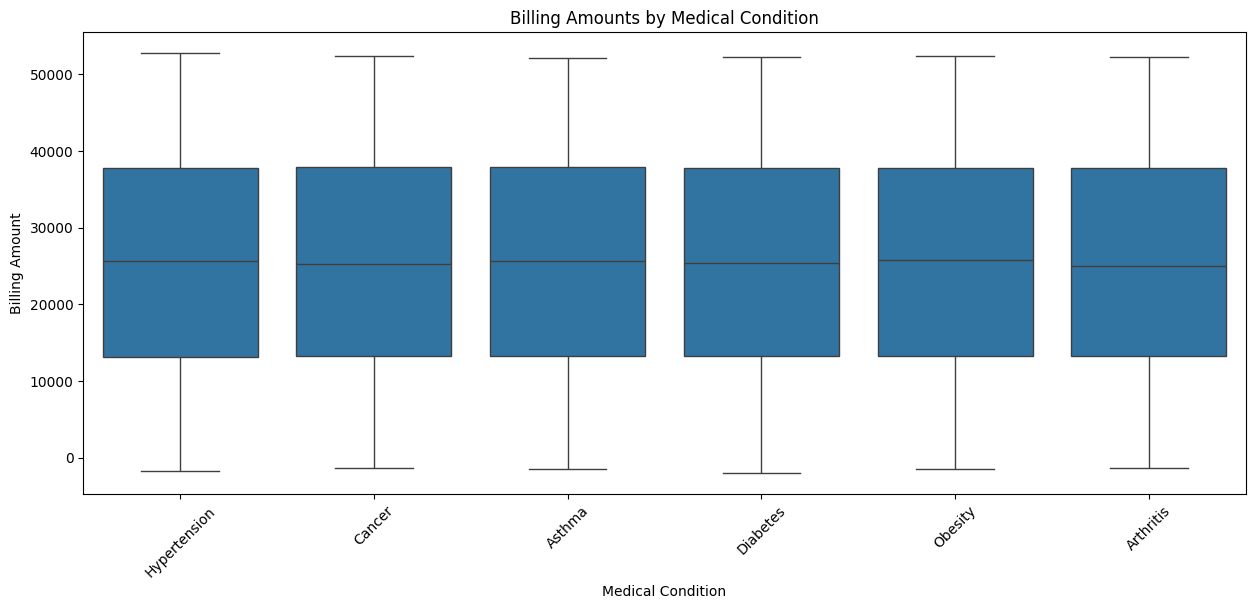

In [217]:
# average billing amount by medical condition
bill_condition = data.groupby("Medical Condition")["Billing Amount"].mean().sort_values(ascending=False)

print("Average Billing Amount by Medical Condition:")
print(round(bill_condition, 2)) 

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x="Medical Condition", y="Billing Amount")
plt.title("Billing Amounts by Medical Condition")
plt.xticks(rotation=45)
plt.show()


#### **Average Length of Stay  and Billing Amount by Hospital**

In [218]:
# Calculate average Length of Stay and Billing Amount by Hospital
hospital_bill_los = data.groupby("Hospital").agg(
    Avg_Billing_Amount=("Billing Amount", "mean"),
    Avg_LoS=("LoS", "mean"),    
).sort_values("Avg_Billing_Amount", ascending=False)

hospital_bill_los.reset_index(inplace=True)
hospital_bill_los["Avg_LoS"] = round(hospital_bill_los["Avg_LoS"], 2)
hospital_bill_los["Avg_Billing_Amount"] = round(hospital_bill_los["Avg_Billing_Amount"], 2)

# gradient colouring
cmap = sns.color_palette("bwr", as_cmap=True).reversed()  
hospital_bill_los.style.background_gradient(
    subset=["Avg_Billing_Amount", "Avg_LoS"],
    cmap=cmap,
    axis=0
).format({
    "Avg_Billing_Amount": "{:,.2f}",
    "Avg_LoS": "{:.2f} days"
})
# hospital_bill_los

,Hospital,Avg_Billing_Amount,Avg_LoS
0,Cedars-Sinai Medical Center,"25,728.81",15.52 days
1,Mayo Clinic,"25,673.48",15.58 days
2,Massachusetts General Hospital,"25,669.13",15.40 days
3,UCLA Medical Center,"25,629.30",15.46 days
4,Johns Hopkins Hospital,"25,577.61",15.53 days
5,Cleveland Clinic,"25,536.14",15.75 days
6,Houston Methodist Hospital,"25,535.65",15.51 days
7,UCSF Medical Center,"25,346.41",15.39 days
8,Northwestern Memorial Hospital,"25,333.51",15.45 days
9,NewYork-Presbyterian Hospital,"25,077.30",15.48 days


In [270]:
hospital_avg_billing = hospital_bill_los[["Hospital", "Avg_Billing_Amount"]]
print(hospital_avg_billing)

                         Hospital  Avg_Billing_Amount
0     Cedars-Sinai Medical Center            25728.81
1                     Mayo Clinic            25673.48
2  Massachusetts General Hospital            25669.13
3             UCLA Medical Center            25629.30
4          Johns Hopkins Hospital            25577.61
5                Cleveland Clinic            25536.14
6      Houston Methodist Hospital            25535.65
7             UCSF Medical Center            25346.41
8  Northwestern Memorial Hospital            25333.51
9   NewYork-Presbyterian Hospital            25077.30


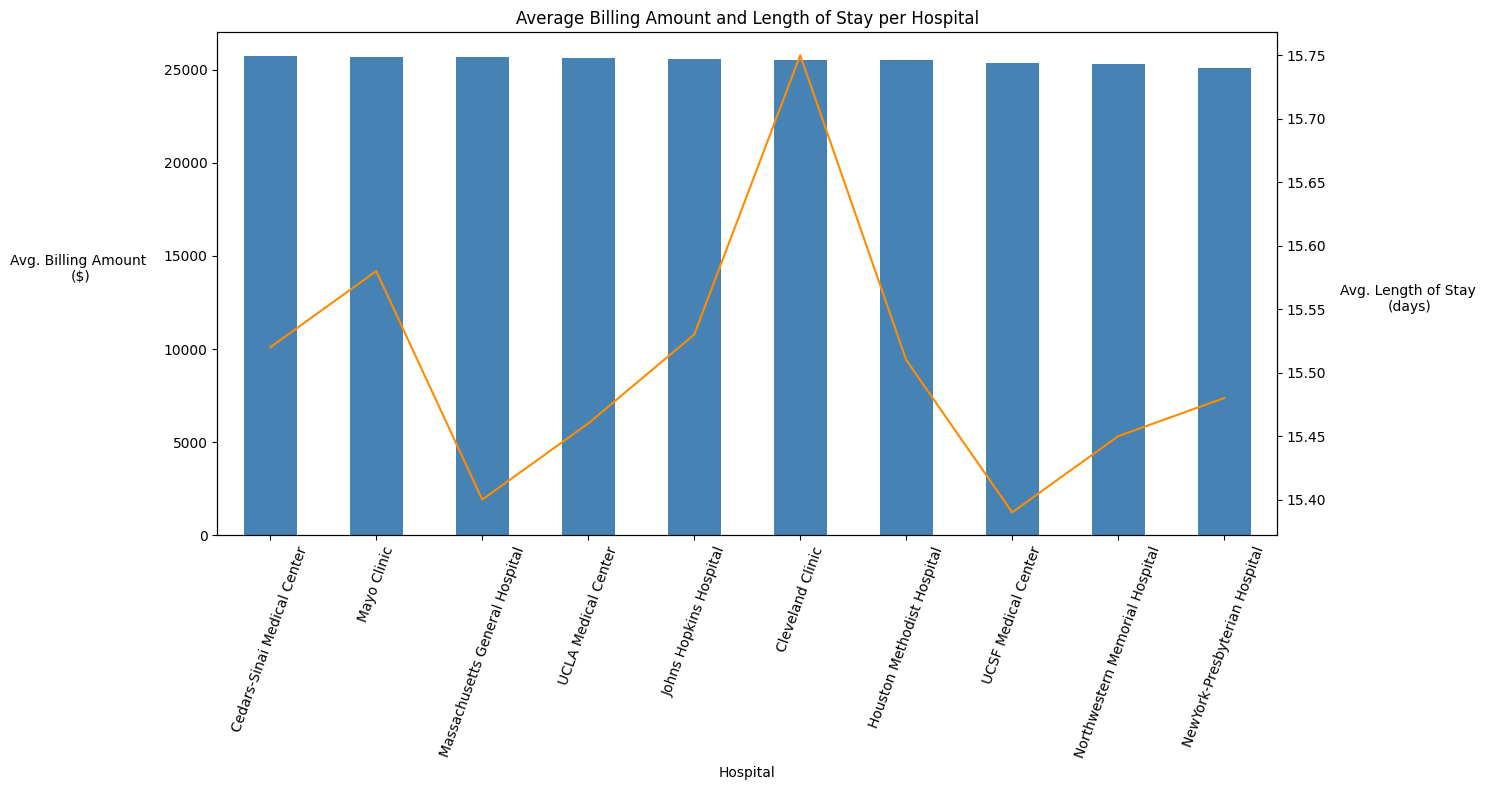

In [219]:
fig, ax1 = plt.subplots(figsize=(15,8))

# bar plot for average billing amount
hospital_bill_los.plot(
    kind="bar", 
    x="Hospital", 
    y="Avg_Billing_Amount", 
    label= "Avg Billing Amount", 
    legend=False,
    ax=ax1,
    color="steelblue")
ax1.set_ylabel("Avg. Billing Amount \n($)", rotation=0, labelpad=60)
ax1.set_xticklabels(hospital_bill_los["Hospital"], rotation=70)

# line plot for average length of stay
ax2 = ax1.twinx()  # shares the same x-axis
hospital_bill_los.plot(
    kind="line", 
    x="Hospital", 
    y="Avg_LoS", 
    ax=ax2, 
    color="darkorange",
    label="Avg Length of Stay (days)",
    legend=False)
ax2.set_ylabel("Avg. Length of Stay \n(days)", rotation=0, labelpad=60)

plt.title("Average Billing Amount and Length of Stay per Hospital")
plt.legend
fig.tight_layout();

#### **Billing by Admission Type**

Average Billing Amount by Admission Type
Admission Type
Elective     25602.23
Urgent       25517.36
Emergency    25497.40
Name: Billing Amount, dtype: float64


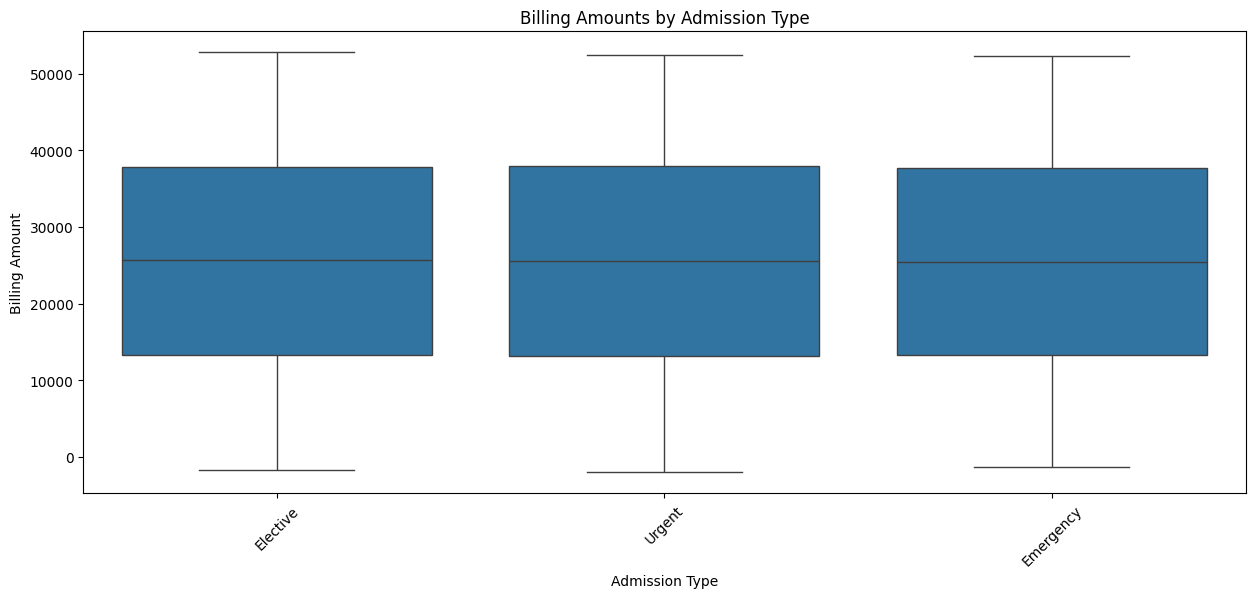

In [262]:
# average billing amount by medical condition
bill_adm_type = data.groupby("Admission Type")["Billing Amount"].mean().sort_values(ascending=False)

print("Average Billing Amount by Admission Type")
print(round(bill_adm_type, 2)) 

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x="Admission Type", y="Billing Amount")
plt.title("Billing Amounts by Admission Type")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# average Length of Stay and Billing Amount by Admission Type
adm_type_bill_los = data.groupby("Admission Type").agg(
    Avg_Billing_Amount=("Billing Amount", "mean"),
    Avg_LoS=("LoS", "mean"),    
).sort_values("Avg_Billing_Amount", ascending=False)

adm_type_bill_los.reset_index(inplace=True)
adm_type_bill_los["Avg_LoS"] = round(hospital_bill_los["Avg_LoS"], 2)
adm_type_bill_los["Avg_Billing_Amount"] = round(hospital_bill_los["Avg_Billing_Amount"], 2)

# gradient colouring
cmap = sns.color_palette("bwr", as_cmap=True).reversed()  
adm_type_bill_los.style.background_gradient(
    subset=["Avg_Billing_Amount", "Avg_LoS"],
    cmap=cmap,
    axis=0
).format({
    "Avg_Billing_Amount": "{:,.2f}",
    "Avg_LoS": "{:.2f} days"
})
# hospital_bill_los

,Admission Type,Avg_Billing_Amount,Avg_LoS
0,Elective,"25,728.81",15.52 days
1,Urgent,"25,673.48",15.58 days
2,Emergency,"25,669.13",15.40 days


In [269]:
# Ensure no missing values
clean_data = data[['Admission Type', 'Billing Amount', 'LoS']].dropna()

# Compute both in one grouped call
summary = clean_data.groupby('Admission Type').agg({
    'Billing Amount': 'mean',
    'LoS': 'mean'
})
summary["Billing Amount"] = summary["Billing Amount"].round(2)
summary["LoS"] = summary["LoS"].round(2)
summary

,Billing Amount,LoS
Admission Type,,
Elective,25602.23,15.53
Emergency,25497.40,15.60
Urgent,25517.36,15.41


#### **Observations**
**Overall Cost of Treatment**
- The average biling amount (cost of treatment) was $25,539.32. 
- The average costs are fairly consistent across the hospitals, ranging between $25,077.30 to $25,728.81.
- A standardized billing system may be in place. Other influences could be insurance pricing models and federal regulations.

**Conditions**
- Asthma, Obesity and Hypertension have average billing amounts higher than the overall average of $25,539.32.
- Asthma has the highest average cost, even though it has the least average stay (15.39 days).

**LoS and Hospital**
- The length XXX

**LoS and Admission Type**
- With a range of $25,497.40 to $25,602.23, elective admissions have the highest average billing. Urgent and emergency are slightly less expensive.
- Elective admissions have the highest billing, but not the longest stay.

**Negative Billing**
- 108 records had negative billing amounts, with an average of $-499.30. This may affect the overall cost analysis.

### **🏥 Hospital Performance**

#### **Patient Volume**
- Patients admitted per hospital

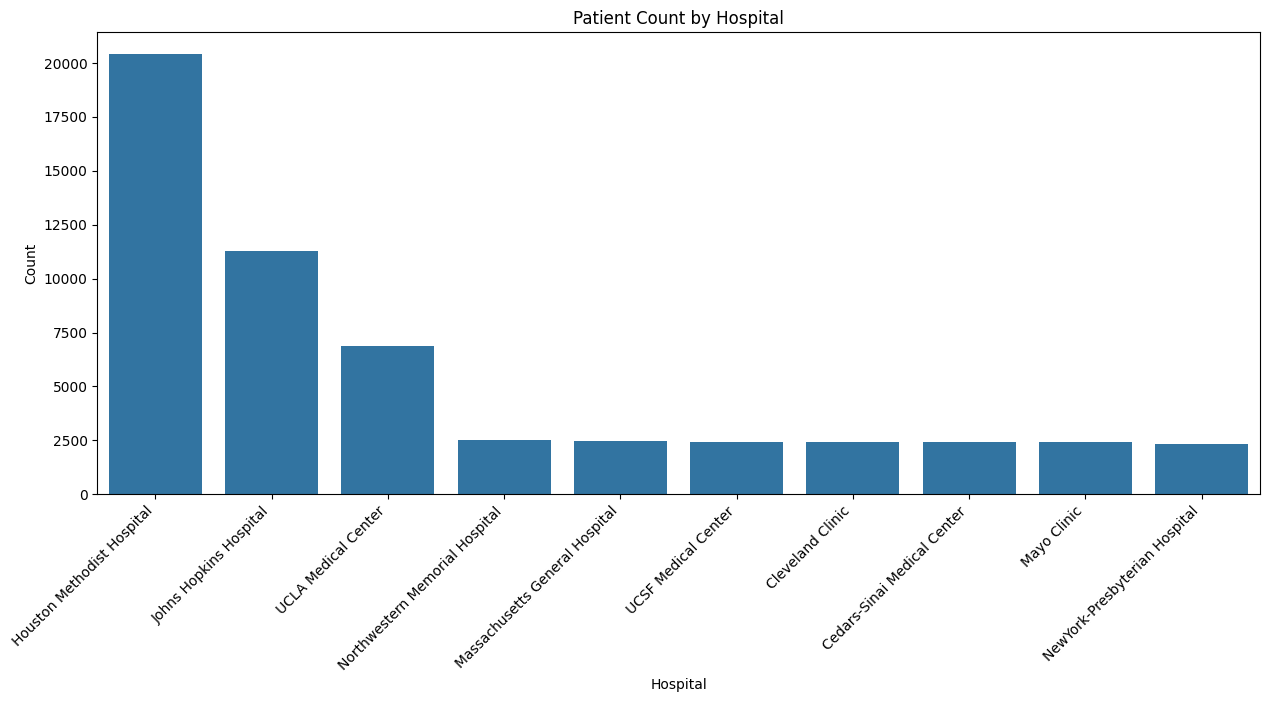

In [220]:
hospital_counts = data["Hospital"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=hospital_counts.index, y=hospital_counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Patient Count by Hospital")
plt.xlabel("Hospital")  
plt.ylabel("Count");

#### **Test Results  by Hospital**

In [430]:
result_hospital = pd.crosstab(data["Hospital"], data["Test Results"])

result_hospital.sort_values(by="Abnormal", ascending=False, inplace=True)
# result_hospital.columns = ["Hospital", "Abnormal", "Inconclusive", "Normal"]
# result_hospital.reset_index(inplace=True)

# Apply a color gradient to highlight the values
result_hospital.style.background_gradient(cmap="bwr", subset=["Abnormal", "Inconclusive", "Normal"])


Test Results,Abnormal,Inconclusive,Normal
Hospital,,,
Houston Methodist Hospital,11241,7163,1998
Johns Hopkins Hospital,6184,3939,1145
UCLA Medical Center,3750,2400,703
Massachusetts General Hospital,1366,854,251
Northwestern Memorial Hospital,1360,895,256
Cedars-Sinai Medical Center,1345,828,232
Cleveland Clinic,1344,847,233
Mayo Clinic,1330,837,233
UCSF Medical Center,1315,869,248


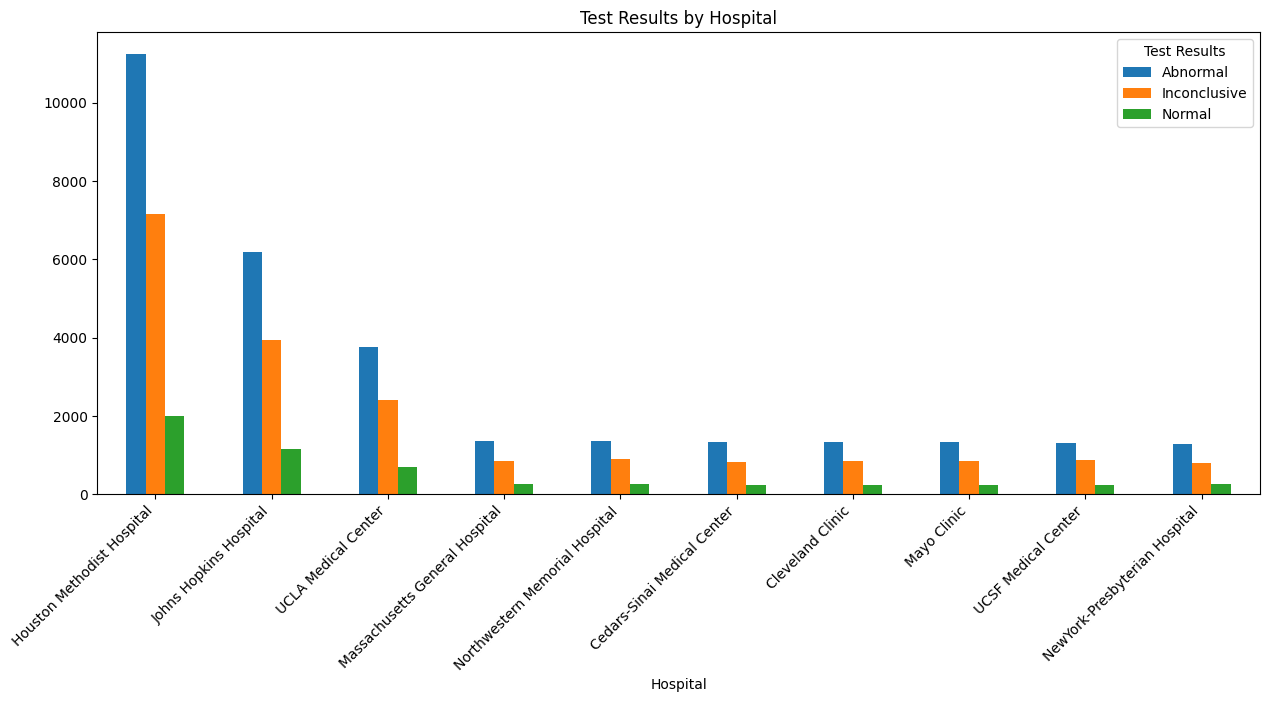

In [276]:
result_hospital.plot(kind="bar", stacked=False, figsize=(15, 6))
plt.xticks(rotation=45, ha="right")
plt.title("Test Results by Hospital");

#### **Doctor-Patient Ratio**

In [223]:
# Calculate the number of unique doctors and total patients
num_doctors = data["Doctor"].nunique()
num_patients = data["Patient ID"].nunique()

# Calculate doctor-to-patient ratio
doctor_patient_ratio = round(num_patients / num_doctors, 2)

print("Number of Doctors: ", num_doctors)
print("Number of Patients: ", num_patients)  
print("Overall Doctor-to-Patient Ratio: 1:", doctor_patient_ratio)

Number of Doctors:  40341
Number of Patients:  55500
Overall Doctor-to-Patient Ratio: 1: 1.38


In [422]:
# Doctor-Patient Ratio by Hospital

# df to store the statistics
hospital_stats = data.groupby("Hospital").agg(
    num_doctors=("Doctor", "nunique"),
    num_patients=("Patient ID", "nunique")
)

hospital_stats["Doctor-Patient Ratio"] = round(hospital_stats["num_patients"] / hospital_stats["num_doctors"], 2)

hospital_stats.sort_values("Doctor-Patient Ratio", ascending=False).reset_index()

,Hospital,num_doctors,num_patients,Doctor-Patient Ratio
0,Houston Methodist Hospital,17655,20402,1.16
1,Johns Hopkins Hospital,10305,11268,1.09
2,UCLA Medical Center,6450,6853,1.06
3,Cedars-Sinai Medical Center,2363,2405,1.02
4,Cleveland Clinic,2365,2424,1.02
5,Massachusetts General Hospital,2419,2471,1.02
6,Mayo Clinic,2351,2400,1.02
7,NewYork-Presbyterian Hospital,2282,2334,1.02
8,Northwestern Memorial Hospital,2460,2511,1.02
9,UCSF Medical Center,2392,2432,1.02


#### **Observations**  

**Patient Volume**
- Ten (10) hospitals were analysed.
- Houston Methodist Hospital had the largest share of admissions (20,402) followed by Johns Hopkins Hospital (11,268).
- Mayo Clinic and NewYork-Presbyterian Hospital had the least with 2,400 and 2,334 respectively.

**Test Results**
- Abnormal test results were the majority among all 10 hospitals.
- At Houston Methodist, over 70% of test results were abnormal. Even with the highest patient volume, this is a concerning observation.
- In all hospitals, normal results are less than 10–15% of the total.
- Each hospital has a relatively steady proportion of inconclusive tests.

**Doctor-Patient Ratio**
- With 55,500 patients and 40341 doctors, the ratio of doctor-to-patient is almost 1:1 (i.e. 1: 1.38). 
- Houston Methodist Hospital had the highest number of patients and doctors, and the highest doctor-to-patient ratio of 1.16.
- Johns Hopkins Hospital and UCLA Medical Center followd with 1.09 and 1.06 respectively. 
- All other hospitals had 1.02 each.

### **💊 Medication Analysis**

#### **Most Prescribed Medication**

In [419]:
med_counts = data["Medication"].value_counts().sort_values(ascending=False)
med_counts_pct = (med_counts / med_counts.sum()) * 100
med_counts_table = pd.DataFrame({
    "Count": med_counts,
    "Pct(%)": med_counts_pct.round(2)
})
med_counts_table = med_counts_table.sort_values(by="Count", ascending=False).reset_index()

print(med_counts_table)

# Create horizontal bar chart
fig = px.bar(
    med_counts_table,
    x="Pct(%)",
    y=med_counts_table.index,
    orientation='h',
    color='Count',
    # color_continuous_scale="Blues",
    text="Pct(%)",
    title='Top Prescribed Medications by Count & Percentage'
)

# Customize text labels
fig.update_traces(
    texttemplate='%{text:.2f}%', 
    textposition='outside'
)

# Layout tweaks
fig.update_layout(
    xaxis_title='Patient Count',
    yaxis_title='Medication',
    coloraxis_showscale=False,
    title_x=0.5,
    height=400
)

fig.show()

    Medication  Count  Pct(%)
0      Lipitor  11140   20.07
1    Ibuprofen  11127   20.05
2      Aspirin  11094   19.99
3  Paracetamol  11071   19.95
4   Penicillin  11068   19.94


### **🛡 Insurance Coverage**

#### **Distribution**

In [362]:
providers = data["Insurance Provider"].value_counts()
print(providers)

# pie chart
fig = go.Figure(data=[go.Pie(labels=providers.index, values=providers.values, hole=.7)])
fig.update_layout(
    width=800,  # Set the width of the chart
    height=800,  # Set the height of the chart
    legend=dict(
        x=1.4,  # Horizontal position (0 to 1)
        y=0.8,  # Vertical position (0 to 1)
        xanchor='right',  # Anchor point for the legend
        yanchor='top',  # Anchor point for the legend    
        font=dict(            
            size=17,
            color="black"
        )
    ),
    legend_title_text='Insurance Providers',
    title_text="Insurance Provider Distribution",
    title_x=0.4,  # Center the title
    title_y=0.85,  # Adjust the vertical position of the title
    title_font=dict(size=20),  # Font size of the title
    title_font_color="black"  # Font color of the title
)
fig.update_traces(
    textfont=dict(size=15)
)
fig.show()

Insurance Provider
Medicare            27750
UnitedHealthCare    16650
Aetna                5550
Cigna                5550
Name: count, dtype: int64


#### **Cost vs Insurance**

In [377]:
insurance_billing = data.groupby("Insurance Provider")["Billing Amount"].mean().sort_values(ascending=False)
insurance_billing = round(insurance_billing, 2).reset_index()
print(insurance_billing)

fig = px.bar(
    insurance_billing, 
    x="Insurance Provider",
    y="Billing Amount",
    # text=insurance_billing.values,
    title="Average Billing Amount by Insurance Provider"
)
fig.show()

  Insurance Provider  Billing Amount
0              Cigna        25727.04
1   UnitedHealthCare        25588.76
2           Medicare        25494.43
3              Aetna        25427.70


#### **Coverage by Medical Condition**

In [382]:
coverage_by_condition = data.groupby(["Medical Condition", "Insurance Provider"]).size().unstack()
# Display the result
coverage_by_condition

Insurance Provider,Aetna,Cigna,Medicare,UnitedHealthCare
Medical Condition,,,,
Arthritis,555.0,555.0,2775.0,1665.0
Asthma,NaN,NaN,2775.0,1110.0
Cancer,555.0,555.0,2775.0,1665.0
Diabetes,1110.0,1110.0,7215.0,4440.0
Hypertension,1665.0,1665.0,6660.0,3885.0
Obesity,1665.0,1665.0,5550.0,3885.0


In [ ]:
# Create figure
fig = go.Figure()

# Add a bar for each Insurance Provider
for provider in coverage_by_condition.columns: # for each column
    fig.add_trace(go.Bar(
        x=coverage_by_condition.index, # conditions
        y=coverage_by_condition[provider],
        name=provider,
        text=coverage_by_condition[provider],
        textposition='outside'
    ))
# Update layout
fig.update_layout(
    barmode='group',
    title='Patient Coverage by Insurance Provider and Medical Condition',
    xaxis_title='Medical Condition',
    yaxis_title='Number of Patients',
    title_x=0.3,
    height=600,
    legend_title_text='Insurance Providers'
)

fig.show()

#### **Insurance Provider vs Test Results**

In [398]:
provider_results = data.groupby("Insurance Provider")["Test Results"].value_counts().sort_values(ascending=False)
provider_results = round(provider_results, 2).reset_index()
print(provider_results)

fig = px.bar(
    provider_results, 
    barmode="group",    
    x="Insurance Provider",
    y="count",
    color="Test Results",
    # text="count",
    title="Test Results by Insurance Provider"
)
fig.show()

   Insurance Provider  Test Results  count
0            Medicare      Abnormal  16650
1            Medicare  Inconclusive   8325
2    UnitedHealthCare      Abnormal   8325
3    UnitedHealthCare  Inconclusive   6660
4            Medicare        Normal   2775
5               Aetna      Abnormal   2775
6               Cigna      Abnormal   2775
7               Aetna  Inconclusive   2220
8               Cigna  Inconclusive   2220
9    UnitedHealthCare        Normal   1665
10              Aetna        Normal    555
11              Cigna        Normal    555


#### **Observations**

**Distribution**
- There were four (4) providers namely Medicare, UnitedHealthCare, Aetna, Cigna
- Medicare had most patients, Cigna and Aetna tied with 5,550 each.

**Cost vs Insurance**
- Cigna

**Medical Conditions**
- Asthma

**Outcome**
- Abnormal